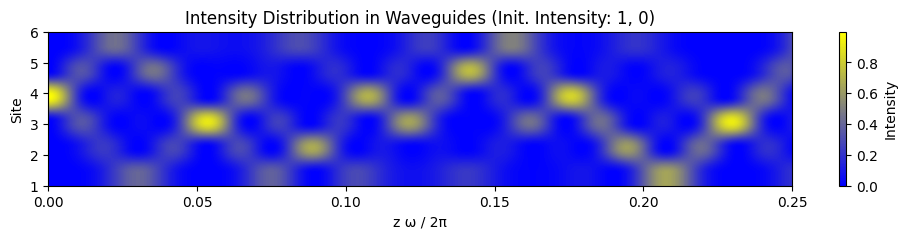

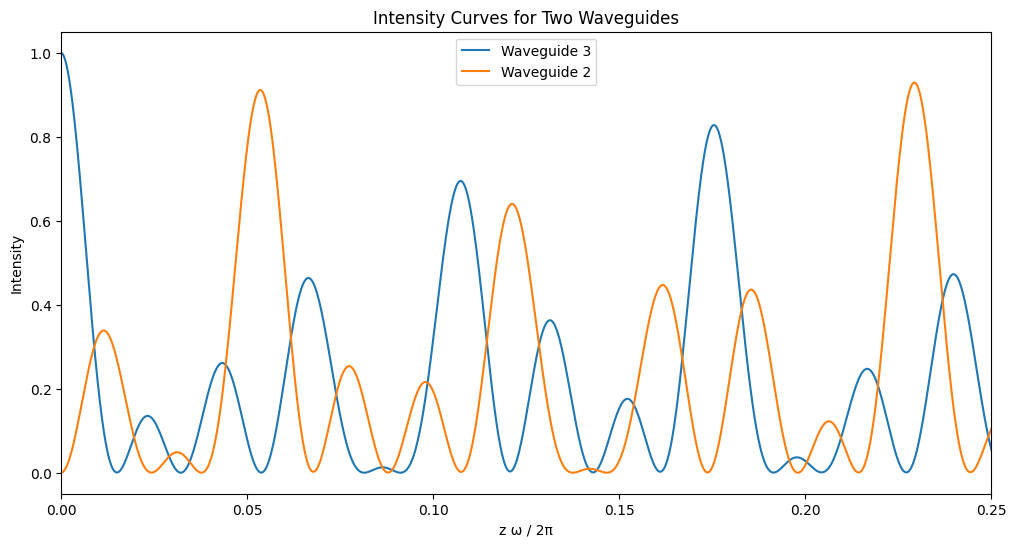

Total intensity at each step: [0.9999999999999986, 0.9999999999999852, 0.9999999999999724, 0.9999999999999595, 0.9999999999999466, 0.9999999999999336, 0.9999999999999207, 0.9999999999999072, 0.999999999999894, 0.999999999999881, 0.999999999999868, 0.9999999999998546, 0.9999999999998416, 0.9999999999998282, 0.9999999999998149, 0.999999999999802, 0.9999999999997884, 0.9999999999997756, 0.9999999999997622, 0.9999999999997485, 0.9999999999997357, 0.9999999999997224, 0.999999999999709, 0.9999999999996956, 0.9999999999996819, 0.9999999999996684, 0.9999999999996556, 0.9999999999996422, 0.9999999999996284, 0.9999999999996152, 0.9999999999996018, 0.9999999999995887, 0.9999999999995753, 0.9999999999995619, 0.9999999999995487, 0.9999999999995354, 0.999999999999522, 0.9999999999995087, 0.9999999999994955, 0.9999999999994823, 0.9999999999994691, 0.9999999999994561, 0.9999999999994426, 0.9999999999994296, 0.9999999999994162, 0.9999999999994035, 0.9999999999993904, 0.9999999999993772, 0.9999999999993

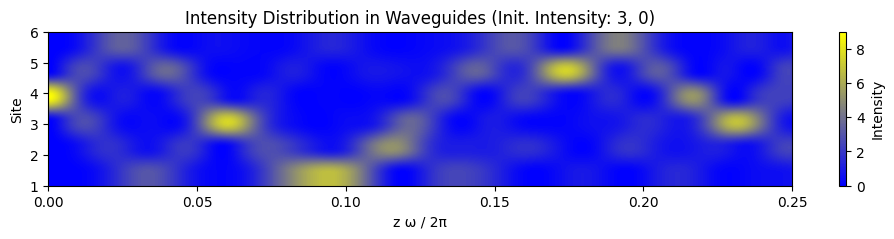

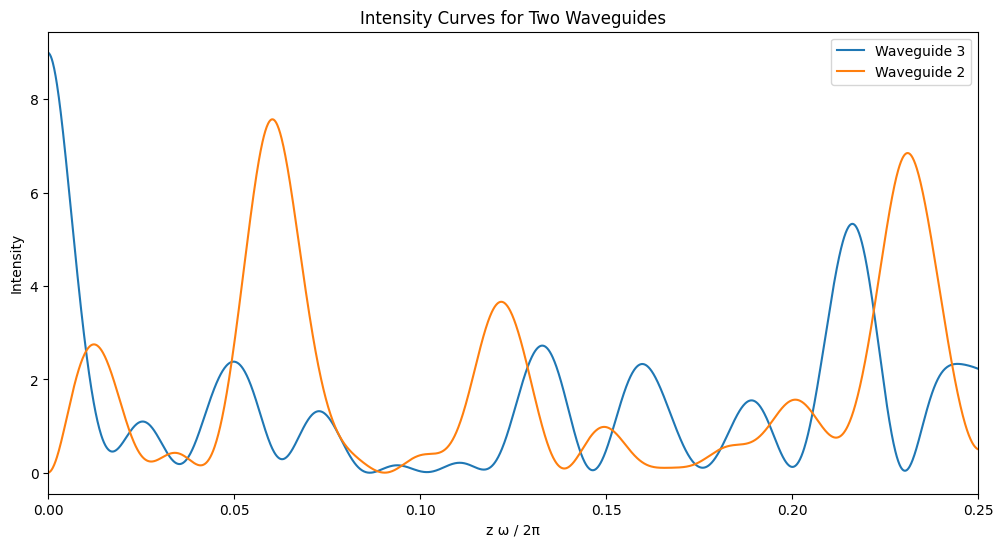

Total intensity at each step: [8.999999999997842, 8.999999999985219, 8.999999999972355, 8.999999999959256, 8.999999999945956, 8.999999999932461, 8.999999999918801, 8.999999999904997, 8.99999999989108, 8.999999999877067, 8.999999999862991, 8.999999999848875, 8.999999999834753, 8.999999999820647, 8.999999999806583, 8.999999999792593, 8.9999999997787, 8.999999999764924, 8.999999999751305, 8.999999999737852, 8.999999999724588, 8.999999999711543, 8.999999999698728, 8.999999999686167, 8.999999999673868, 8.999999999661846, 8.999999999650118, 8.99999999963869, 8.99999999962757, 8.999999999616769, 8.999999999606288, 8.999999999596133, 8.99999999958631, 8.99999999957681, 8.99999999956764, 8.999999999558794, 8.999999999550273, 8.99999999954207, 8.99999999953418, 8.9999999995266, 8.999999999519321, 8.999999999512333, 8.999999999505636, 8.999999999499215, 8.999999999493063, 8.99999999948717, 8.999999999481528, 8.999999999476131, 8.999999999470964, 8.999999999466024, 8.999999999461295, 8.99999999945

<ipython-input-5-8174ee5ba4eb>:31: RuntimeWarning: overflow encountered in matmul
  dydt = -1j * H_sys @ psi
<ipython-input-5-8174ee5ba4eb>:31: RuntimeWarning: invalid value encountered in matmul
  dydt = -1j * H_sys @ psi
<ipython-input-5-8174ee5ba4eb>:26: RuntimeWarning: overflow encountered in square
  nonlinear_term = sigma * (np.abs(psi**2)) * np.identity(len(psi))
<ipython-input-5-8174ee5ba4eb>:26: RuntimeWarning: invalid value encountered in multiply
  nonlinear_term = sigma * (np.abs(psi**2)) * np.identity(len(psi))
<ipython-input-5-8174ee5ba4eb>:31: RuntimeWarning: invalid value encountered in multiply
  dydt = -1j * H_sys @ psi


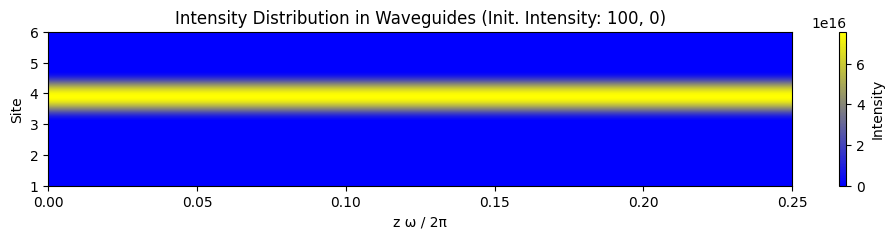

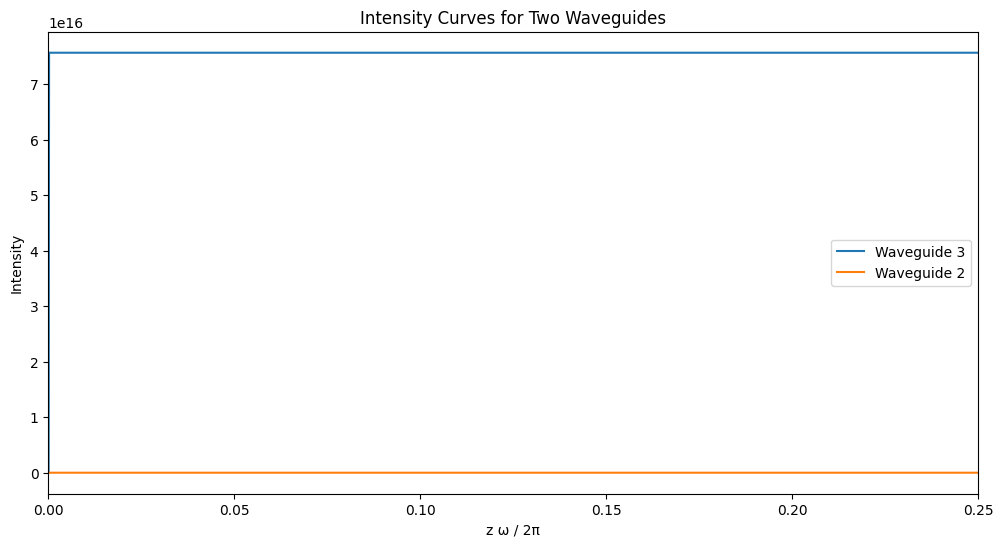

Total intensity at each step: [15351.48274403762, 35548.86745841708, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365194565e+16, 7.567182365

In [5]:
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the custom colormap transitioning from blue to yellow
colors = [(0, 0, 1), (1, 1, 0)]  # Blue to Yellow
n_bins = 100
cmap_name = 'blue_to_yellow'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Define Hamiltonian function
def makeH_RM(N, omega, t):
    J_max = 1
    J = J_max  # Example value
    H_lin = np.zeros((N, N))
    for i in range(N-1):
        H_lin[i, i+1] = H_lin[i+1, i] = J
    H = sp.csr_matrix(H_lin)
    return H

# Define the ODE function
def odefun_soliton(t, y, H, sigma):
    psi = y.reshape(-1, 1)
    nonlinear_term = sigma * (np.abs(psi**2)) * np.identity(len(psi))
    # intensity = np.abs(psi)**2
    # nonlinear_term = sigma * np.diag(intensity)
    H_sys = H.toarray() + nonlinear_term
    #print("H:",H_sys)
    dydt = -1j * H_sys @ psi
    return dydt.flatten()

# Parameters
N = 6 # number of waveguides
L = 80
omega = 2 * np.pi / L
dz = 0.01
z = np.arange(0, 80, dz)
J_max = 1
sigma = -0.3 * J_max

# Function to run the simulation for different initial intensities
def run_simulation(initial_intensity_waveguide_1, initial_intensity_waveguide_2):
    y0 = np.zeros(N, dtype=complex)
    y0[N // 2] = initial_intensity_waveguide_1
    y0[N // 2 - 1] = initial_intensity_waveguide_2
    # Normalization is not used here to see the effect of absolute initial intensities

    # Initialize matrices
    H = makeH_RM(N, omega, 0)
    g2 = np.zeros((N, len(z)), dtype=complex)
    total_intensity = []

    # Time evolution
    for index, t in enumerate(range(0, len(z))):
        H = makeH_RM(N, omega, t)
        sol = solve_ivp(lambda t, y: odefun_soliton(t, y, H, sigma), [t * dz, (t + 1) * dz], y0, method='RK45')
        g2[:, index] = sol.y[:, -1]
        y0 = sol.y[:, -1]  # / np.linalg.norm(sol.y[:, -1])
        #print('y0',y0)
        total_intensity.append(np.sum(np.abs(g2[:, index])**2))

    # Plotting intensity distribution
    plt.figure(figsize=(12, 2))
    plt.imshow(np.abs(g2)**2, aspect='auto', extent=[0, z[-1] * omega / (2 * np.pi), 1, N], origin='lower', cmap=cmap)
    plt.colorbar(label='Intensity')
    plt.xlim([0, 0.25])
    plt.ylabel('Site')
    plt.xlabel('z ω / 2π')
    plt.title(f'Intensity Distribution in Waveguides (Init. Intensity: {initial_intensity_waveguide_1}, {initial_intensity_waveguide_2})')
    plt.show()

    # Plot intensity curves for two specific waveguides
    waveguide_1 = N // 2
    waveguide_2 = N // 2 - 1

    intensity_waveguide_1 = np.abs(g2[waveguide_1, :])**2
    intensity_waveguide_2 = np.abs(g2[waveguide_2, :])**2

    plt.figure(figsize=(12, 6))
    plt.plot(z * omega / (2 * np.pi), intensity_waveguide_1, label=f'Waveguide {waveguide_1}')
    plt.plot(z * omega / (2 * np.pi), intensity_waveguide_2, label=f'Waveguide {waveguide_2}')
    plt.xlim([0, 0.25])
    plt.xlabel('z ω / 2π')
    plt.ylabel('Intensity')
    plt.title('Intensity Curves for Two Waveguides')
    plt.legend()
    plt.show()

    # # Plot total intensity over z
    # plt.figure(figsize=(12, 6))
    # plt.plot(z * omega / (2 * np.pi), total_intensity)
    # plt.xlim([0, 0.25])
    # plt.xlabel('z ω / 2π')
    # plt.ylabel('Total Intensity')
    # plt.title('Total Intensity in All Waveguides Over z')
    # plt.show()

    print('Total intensity at each step:', total_intensity)

# Run simulations for different initial intensities
run_simulation(1, 0)
run_simulation(3, 0)
run_simulation(100, 0)
